In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
!pip install xlrd
!pip install openpyxl

/kaggle/input/tendata/Spectrum Database Description.docx
/kaggle/input/tendata/Spectrum Database_March 2021.xlsx
/kaggle/input/tendata/Spectrum Payments_March 2021.xlsx
     |████████████████████████████████| 96 kB 388 kB/s 
     |████████████████████████████████| 243 kB 413 kB/s 


In [2]:
file1 = '../input/tendata/Spectrum Database_March 2021.xlsx'
data_frame_1 = pd.read_excel(file1,sheet_name = 'lots-032021')

file2 = '../input/tendata/Spectrum Payments_March 2021.xlsx'
data_frame_2 = pd.read_excel(file2,sheet_name = 'Spectrum Payments_March 2021')

In [3]:
df1=data_frame_1

In [4]:
df2=data_frame_2

In [5]:
print(df1.columns)
print(df2.columns)

Index(['awardId', 'lotId', 'awardName', 'countryName', 'alpha3code',
       'nBidders', 'date', 'awardClassDescription', 'availableSpectrumPaired',
       'availableSpectrumUnpaired', 'licenceUse', 'awardComments', 'lotName',
       'winner', 'freqBand', 'nationalLicence', 'region', 'blockFreq',
       'paired', 'unpaired', 'licenceDuration', 'popCovered',
       'reservePriceLocal', 'headlinePriceLocal', 'entrantReserved',
       'lotComments'],
      dtype='object')
Index(['lotId', 'year', 'amount', 'minAmount'], dtype='object')


In [6]:
df1[df1['countryName'] == 'United States']
df1

,awardId,lotId,awardName,countryName,alpha3code,nBidders,date,awardClassDescription,availableSpectrumPaired,availableSpectrumUnpaired,...,region,blockFreq,paired,unpaired,licenceDuration,popCovered,reservePriceLocal,headlinePriceLocal,entrantReserved,lotComments
0,1,1,PCS 800MHz-1800MHz auction,Australia,AUS,9.0,1998-04-20,Auction - Largely standard SMRA,1490.0,0.0,...,Brisbane,825-830MHz/870-875MHz,10.0,0.0,15.0,1735500.0,867750.0,6137000.0,1.0,NaN
1,1,2,PCS 800MHz-1800MHz auction,Australia,AUS,9.0,1998-04-20,Auction - Largely standard SMRA,1490.0,0.0,...,Brisbane,830-835MHz/875-880MHz,10.0,0.0,15.0,1735500.0,867750.0,5322000.0,1.0,NaN
2,1,3,PCS 800MHz-1800MHz auction,Australia,AUS,9.0,1998-04-20,Auction - Largely standard SMRA,1490.0,0.0,...,Brisbane,835-840MHz/880-885MHz,10.0,0.0,15.0,1735500.0,867750.0,7039000.0,0.0,NaN
3,1,4,PCS 800MHz-1800MHz auction,Australia,AUS,9.0,1998-04-20,Auction - Largely standard SMRA,1490.0,0.0,...,Brisbane,840-845MHz/885-890MHz,10.0,0.0,15.0,1735500.0,867750.0,9902000.0,0.0,NaN
4,1,5,PCS 800MHz-1800MHz auction,Australia,AUS,9.0,1998-04-20,Auction - Largely standard SMRA,1490.0,0.0,...,Brisbane,1710-1712.5MHz/1805-1807.5MHz,5.0,0.0,15.0,1735500.0,433870.0,954000.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36579,487,36710,USA Auction 105,United States,USA,271.0,2020-08-25,Auction - Largely standard clock,0.0,70.0,...,St. Thomas,NaN,0.0,10.0,10.0,51634.0,10000.0,24000.0,0.0,NaN
36580,487,36711,USA Auction 105,United States,USA,271.0,2020-08-25,Auction - Largely standard clock,0.0,70.0,...,St. Thomas,NaN,0.0,10.0,10.0,51634.0,10000.0,24000.0,0.0,NaN
36581,487,36712,USA Auction 105,United States,USA,271.0,2020-08-25,Auction - Largely standard clock,0.0,70.0,...,St. Thomas,NaN,0.0,10.0,10.0,51634.0,10000.0,24000.0,0.0,NaN
36582,487,36713,USA Auction 105,United States,USA,271.0,2020-08-25,Auction - Largely standard clock,0.0,70.0,...,St. Thomas,NaN,0.0,10.0,10.0,51634.0,10000.0,24000.0,0.0,NaN


In [7]:
df = pd.merge(df1, df2, on=['lotId','lotId'])

In [8]:
df.columns
df = df.sort_values(by='date')
df['date'] = pd.to_datetime(df['date'])

In [9]:
start_date = '2000-01-01'
end_date = '2008-01-01'
mask = (df['date'] > start_date) & (df['date'] <= end_date)
dfp = df.loc[mask]
dfp.describe()

,awardId,lotId,nBidders,availableSpectrumPaired,availableSpectrumUnpaired,nationalLicence,paired,unpaired,licenceDuration,popCovered,reservePriceLocal,headlinePriceLocal,entrantReserved,year,amount,minAmount
count,14138.000000,14138.000000,14131.000000,13533.000000,13709.000000,14138.00000,13598.000000,13612.000000,14105.000000,1.412200e+04,1.309400e+04,1.413800e+04,14088.000000,14138.000000,1.392600e+04,1.405000e+04
mean,143.077946,7430.689136,48.347605,14213.101000,10625.665986,0.12477,28.252574,4.929121,14.721671,3.493917e+06,4.859000e+09,5.433350e+09,0.014055,4.552412,1.006017e+09,8.838066e+08
std,55.468171,2917.673618,43.377329,10634.540665,11268.605048,0.33047,26.753174,16.307064,3.287031,1.716447e+07,7.288935e+10,7.300483e+10,0.117720,5.277419,1.366348e+10,1.171114e+10
min,4.000000,231.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,94.000000,5563.250000,15.500000,1768.000000,0.000000,0.00000,10.000000,0.000000,15.000000,1.968000e+04,2.000000e+03,3.000000e+03,0.000000,0.000000,4.000000e+02,4.000000e+02
50%,156.000000,8960.500000,50.000000,20440.000000,3400.000000,0.00000,30.000000,0.000000,15.000000,1.129000e+05,7.000000e+03,1.190000e+04,0.000000,2.000000,1.125000e+04,6.850000e+03
75%,192.000000,9613.000000,50.000000,23200.000000,23200.000000,0.00000,40.000000,0.000000,15.000000,1.325029e+06,8.500000e+04,4.377500e+05,0.000000,9.000000,3.017500e+05,1.000000e+05
max,362.000000,12938.000000,168.000000,30820.000000,23200.000000,1.00000,370.000000,250.000000,30.000000,2.856204e+08,1.300000e+12,1.300000e+12,1.000000,29.000000,4.680000e+11,2.600000e+11


In [10]:
start_date = '2000-01-01'
end_date = '2008-01-01'
mask = (df['date'] > start_date) & (df['date'] <= end_date)
dfp = df.loc[mask]
dfp.describe()

,awardId,lotId,nBidders,availableSpectrumPaired,availableSpectrumUnpaired,nationalLicence,paired,unpaired,licenceDuration,popCovered,reservePriceLocal,headlinePriceLocal,entrantReserved,year,amount,minAmount
count,14138.000000,14138.000000,14131.000000,13533.000000,13709.000000,14138.00000,13598.000000,13612.000000,14105.000000,1.412200e+04,1.309400e+04,1.413800e+04,14088.000000,14138.000000,1.392600e+04,1.405000e+04
mean,143.077946,7430.689136,48.347605,14213.101000,10625.665986,0.12477,28.252574,4.929121,14.721671,3.493917e+06,4.859000e+09,5.433350e+09,0.014055,4.552412,1.006017e+09,8.838066e+08
std,55.468171,2917.673618,43.377329,10634.540665,11268.605048,0.33047,26.753174,16.307064,3.287031,1.716447e+07,7.288935e+10,7.300483e+10,0.117720,5.277419,1.366348e+10,1.171114e+10
min,4.000000,231.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,94.000000,5563.250000,15.500000,1768.000000,0.000000,0.00000,10.000000,0.000000,15.000000,1.968000e+04,2.000000e+03,3.000000e+03,0.000000,0.000000,4.000000e+02,4.000000e+02
50%,156.000000,8960.500000,50.000000,20440.000000,3400.000000,0.00000,30.000000,0.000000,15.000000,1.129000e+05,7.000000e+03,1.190000e+04,0.000000,2.000000,1.125000e+04,6.850000e+03
75%,192.000000,9613.000000,50.000000,23200.000000,23200.000000,0.00000,40.000000,0.000000,15.000000,1.325029e+06,8.500000e+04,4.377500e+05,0.000000,9.000000,3.017500e+05,1.000000e+05
max,362.000000,12938.000000,168.000000,30820.000000,23200.000000,1.00000,370.000000,250.000000,30.000000,2.856204e+08,1.300000e+12,1.300000e+12,1.000000,29.000000,4.680000e+11,2.600000e+11


In [11]:
# dfp['']


In [12]:
# sns.pairplot(df, hue="headlinePriceLocal")

(array([10592., 10957., 11323., 11688., 12053., 12418., 12784., 13149.,
        13514., 13879.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

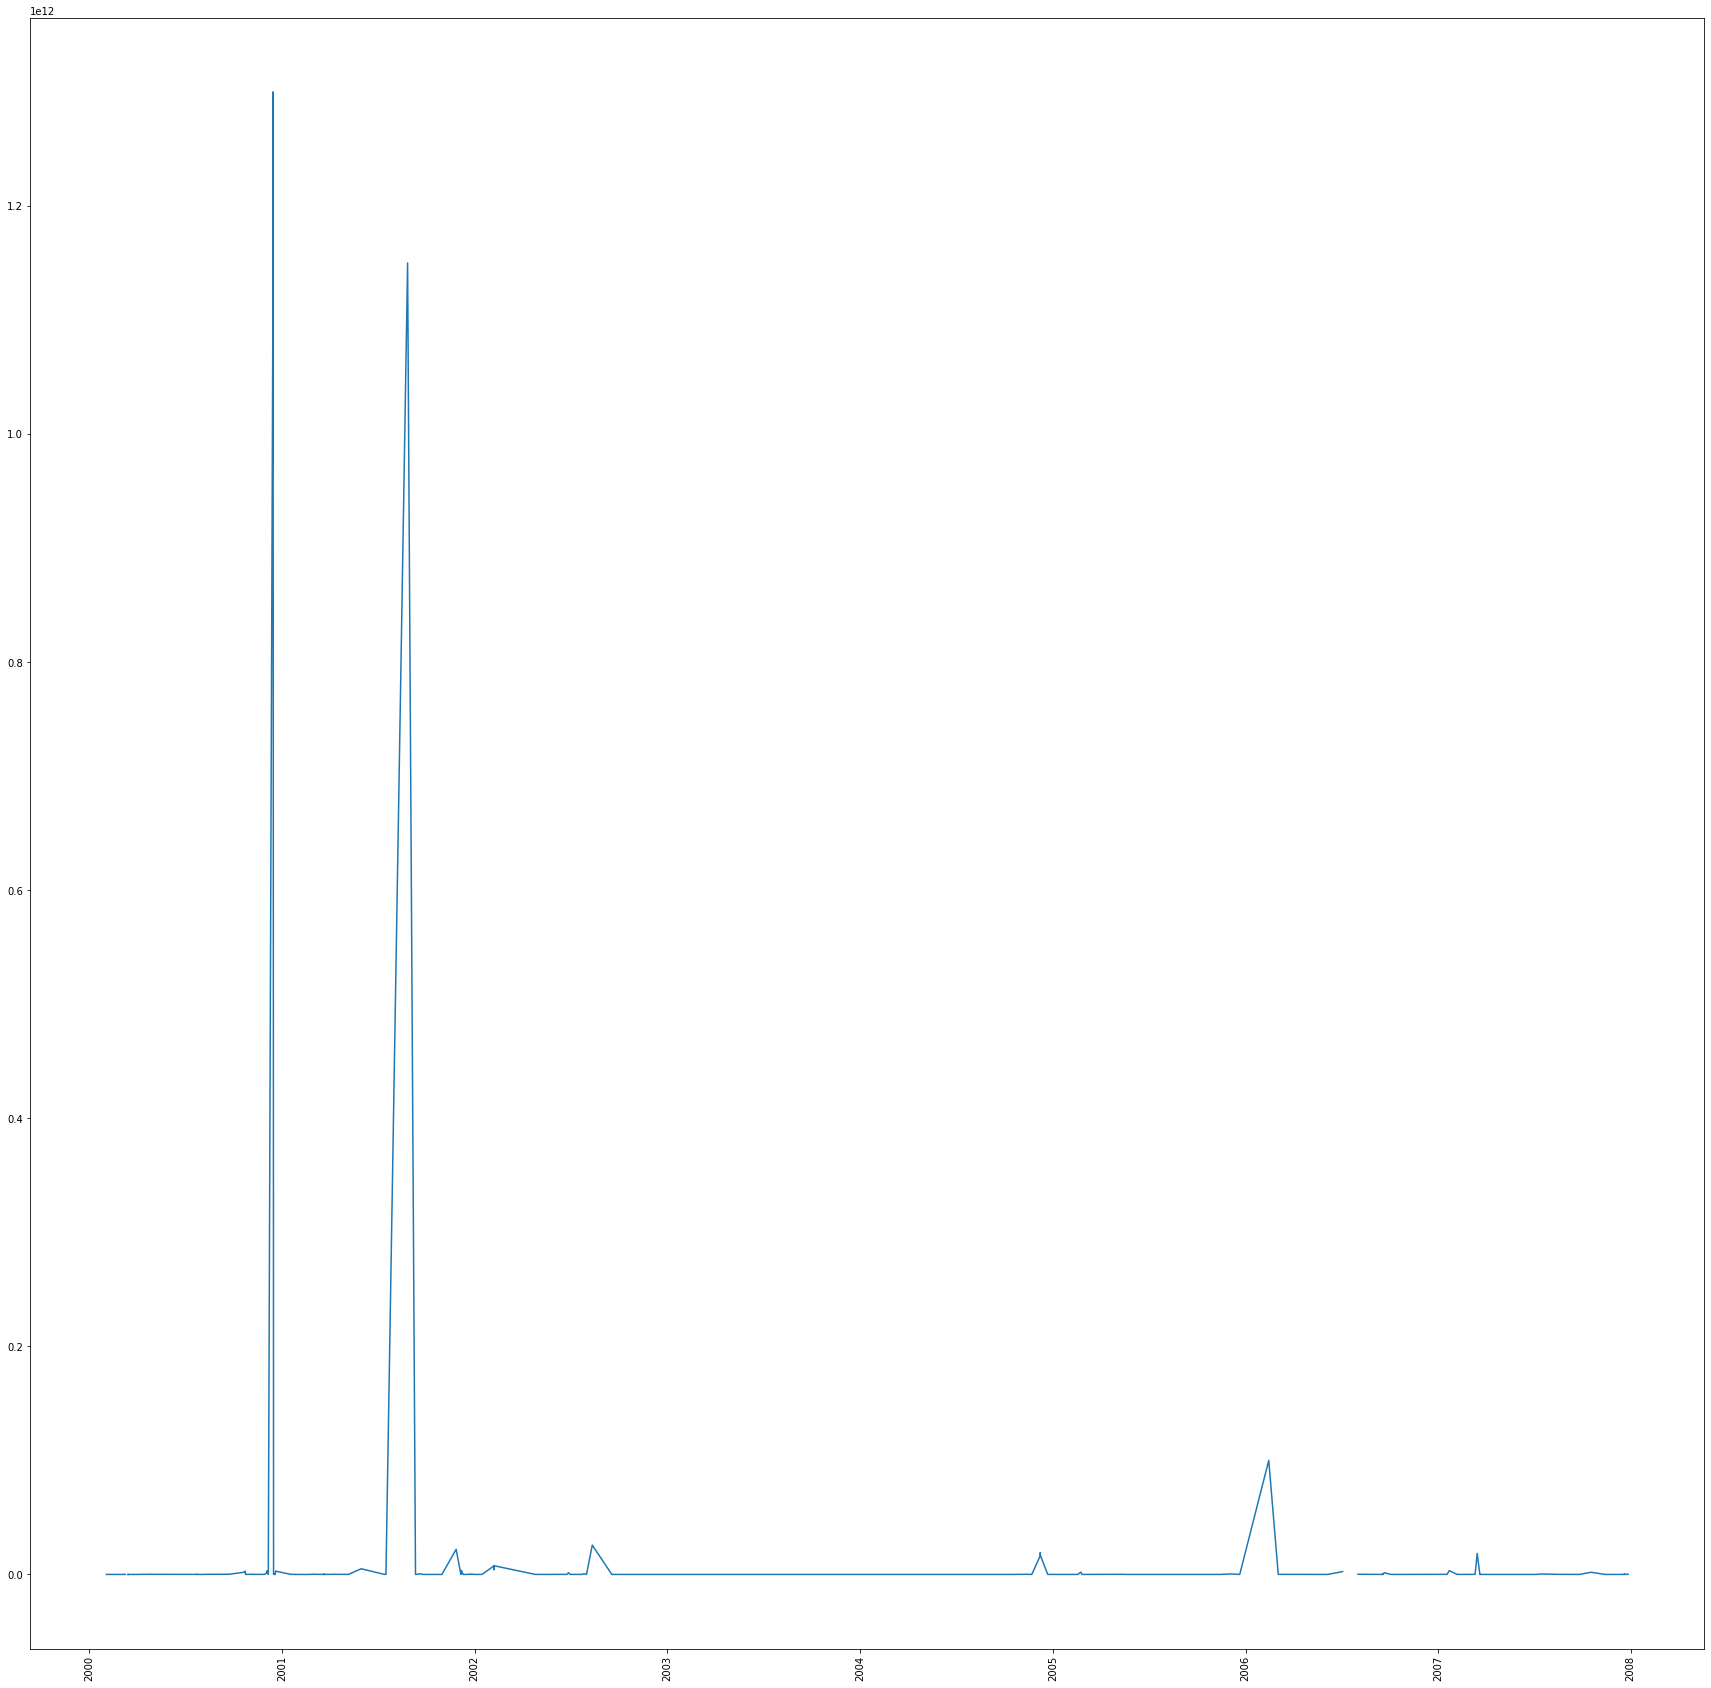

In [13]:
# dfp.dropna(inplace=True,subset=['reservePriceLocal'])
fig, ax = plt.subplots(figsize=(30, 30))
plt.plot(dfp['date'], dfp['reservePriceLocal'])
plt.xticks(rotation='vertical')

(array([10592., 10957., 11323., 11688., 12053., 12418., 12784., 13149.,
        13514., 13879.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

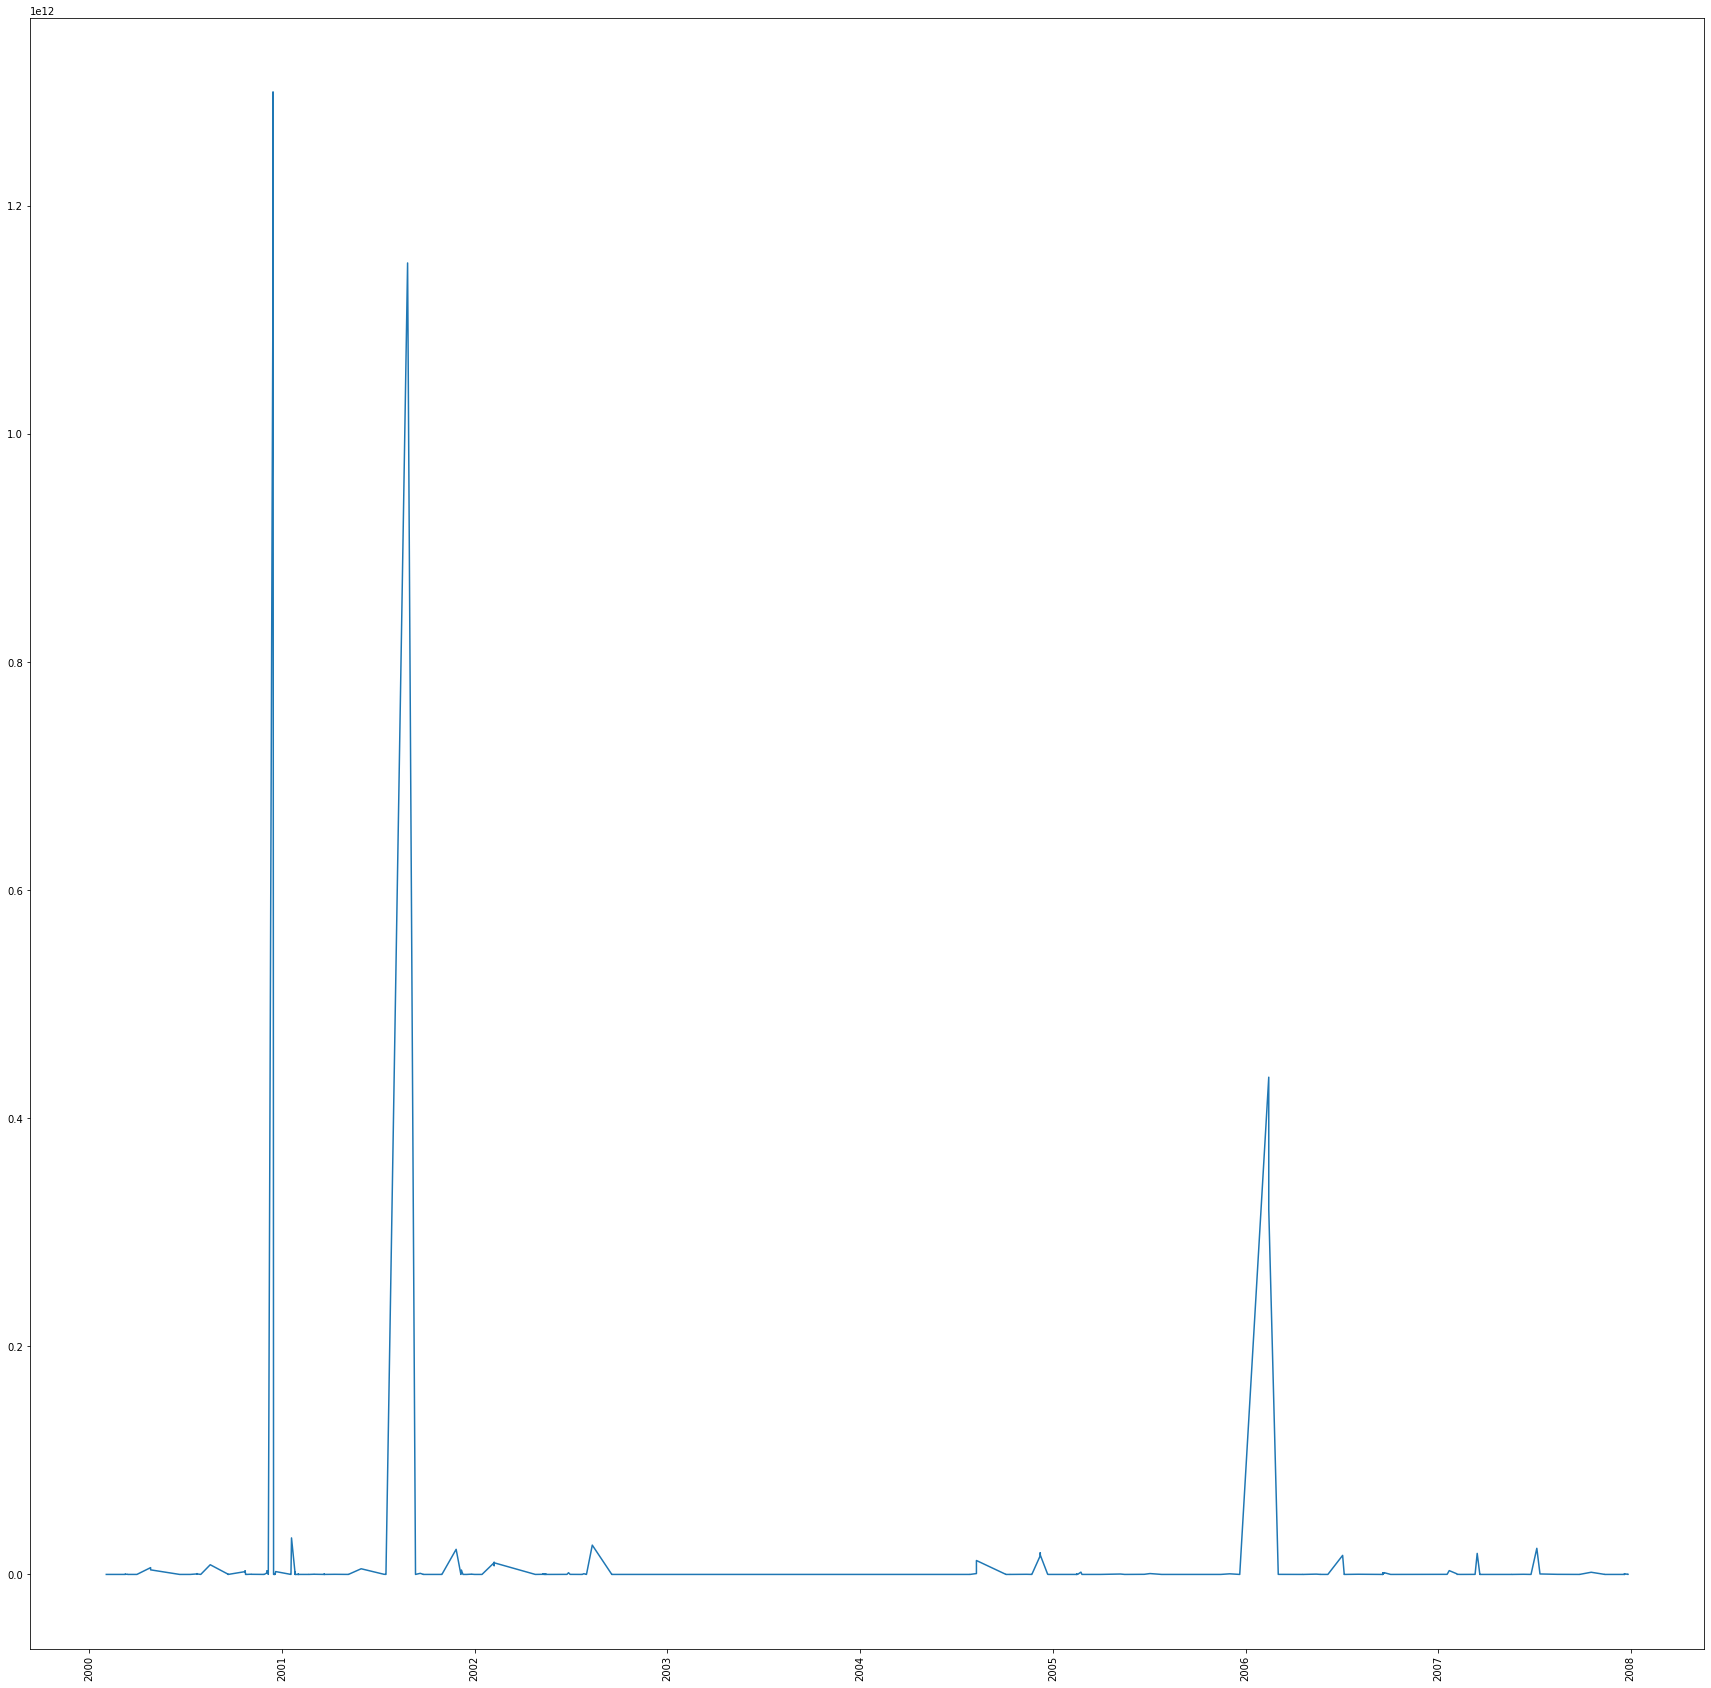

In [14]:
# dfp.dropna(inplace=True,subset=['reservePriceLocal'])
fig, ax = plt.subplots(figsize=(30, 30))
plt.plot(dfp['date'], dfp['headlinePriceLocal'])
plt.xticks(rotation='vertical')

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


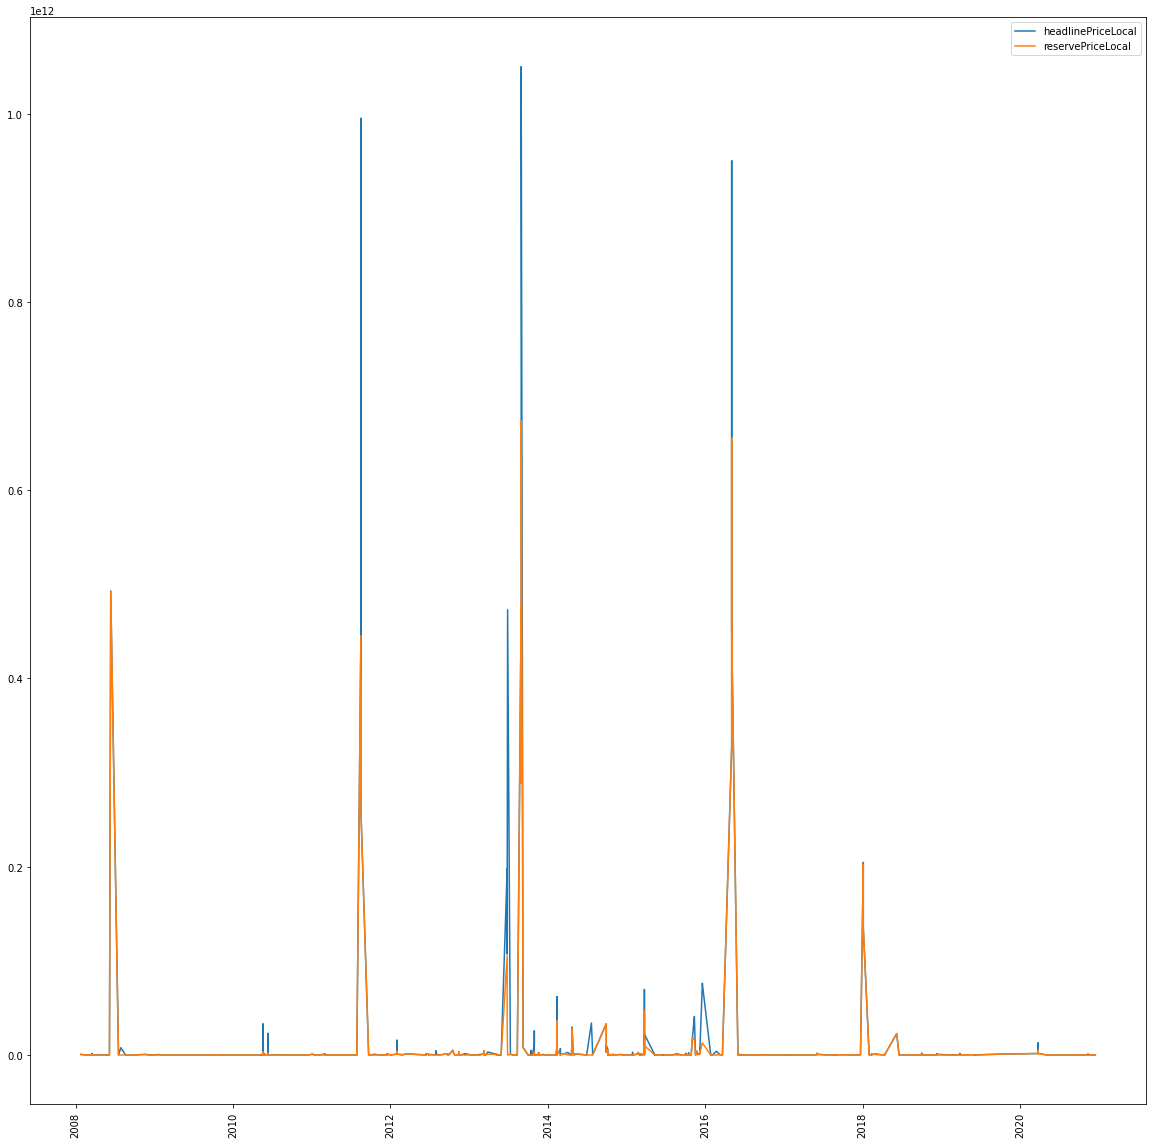

In [15]:
start_date = '2008-01-01'
end_date = '2021-01-01'
mask = (df['date'] > start_date) & (df['date'] <= end_date)
dfp = df.loc[mask]
dfp.describe()

dfp['reservePriceLocal'].fillna(value=0,inplace=True)
dfp['headlinePriceLocal'].fillna(value=0,inplace=True)
# dfp.dropna(inplace=True,subset=['headlinePriceLocal'])

fig, ax = plt.subplots(figsize=(20, 20))

plt.plot(dfp['date'], dfp['headlinePriceLocal'])
plt.plot(dfp['date'], dfp['reservePriceLocal'])

plt.xticks(rotation='vertical')
plt.legend(['headlinePriceLocal','reservePriceLocal'])
# plt.legend(['reservePriceLocal','headlinePriceLocal'])

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


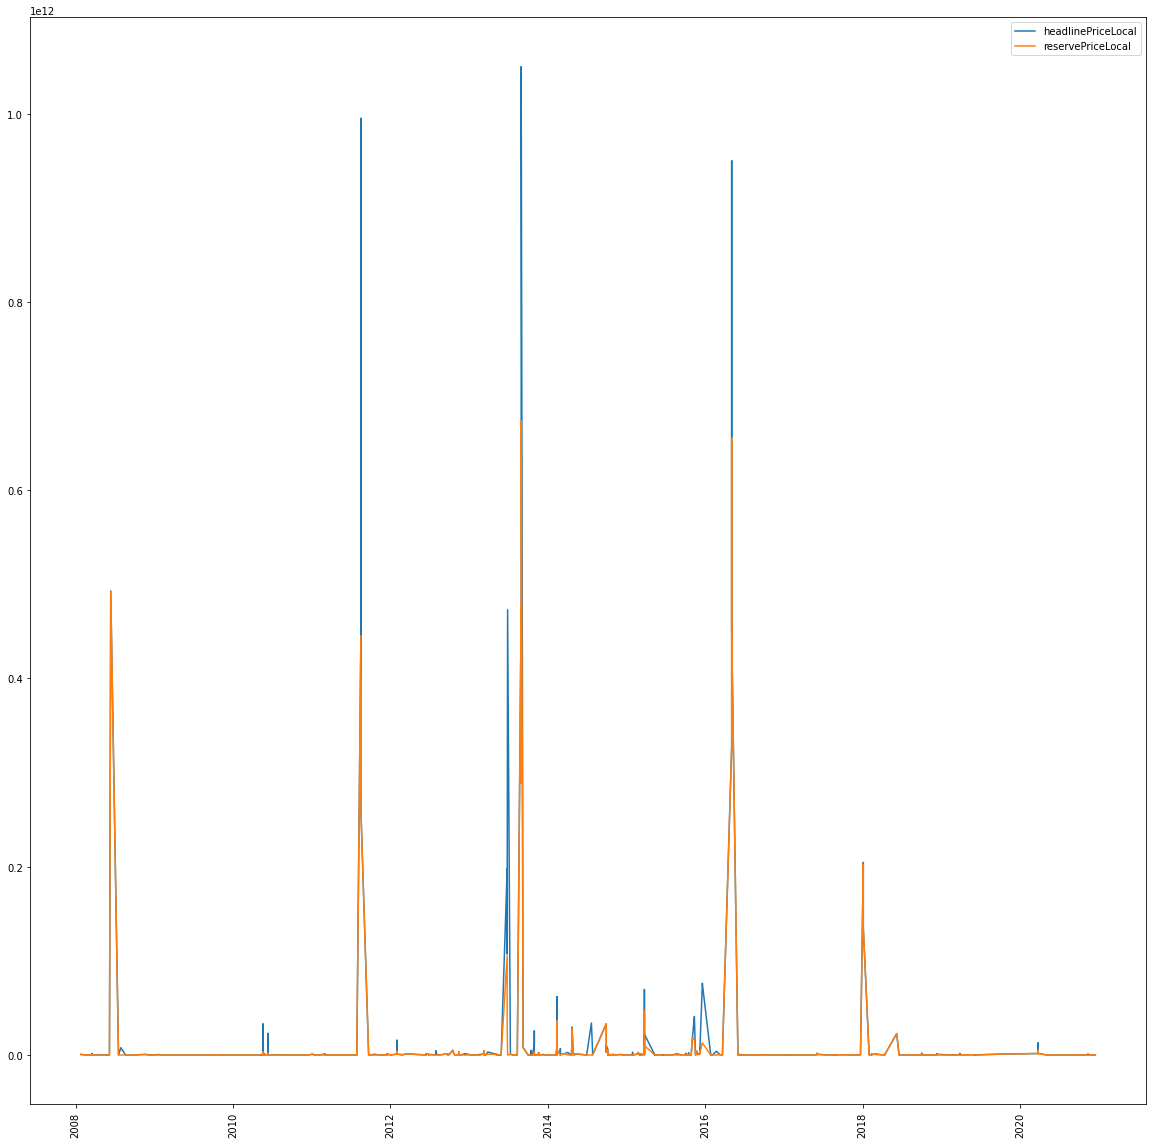

In [16]:
dfp['reservePriceLocal'].fillna(value=0,inplace=True)
dfp['headlinePriceLocal'].fillna(value=0,inplace=True)
# dfp.dropna(inplace=True,subset=['headlinePriceLocal'])

fig, ax = plt.subplots(figsize=(20, 20))

plt.plot(dfp['date'], dfp['headlinePriceLocal'])
plt.plot(dfp['date'], dfp['reservePriceLocal'])

plt.xticks(rotation='vertical')
plt.legend(['headlinePriceLocal','reservePriceLocal'])
# plt.legend(['reservePriceLocal','headlinePriceLocal'])

In [17]:
# # dfn.dropna(inplace=True,subset=['headlinePriceLocal'])
# fig, ax = plt.subplots(figsize=(30, 30))
# plt.plot(dfn['date'], dfn['headlinePriceLocal'])
# plt.xticks(rotation='vertical')

In [18]:
# fig, ax = plt.subplots(figsize=(30, 30))
# plt.plot(dfn['date'], dfn['reservePriceLocal'])
# plt.xticks(rotation='vertical')


In [19]:
# dfn['reservePriceLocal'].fillna(value=0,inplace=True)
# dfn['headlinePriceLocal'].fillna(value=0,inplace=True)
# fig, ax = plt.subplots(figsize=(30, 30))
# plt.plot(dfn['date'], dfn['headlinePriceLocal'])
# plt.plot(dfn['date'], dfn['reservePriceLocal'])
# plt.xticks(rotation='vertical')

In [20]:
df.isnull().sum(axis = 0)
# df[]

awardId                          0
lotId                            0
awardName                        0
countryName                      0
alpha3code                       0
nBidders                      2111
date                             0
awardClassDescription            0
availableSpectrumPaired       2404
availableSpectrumUnpaired     1869
licenceUse                    2269
awardComments                  494
lotName                       4134
winner                           3
freqBand                         5
nationalLicence                  0
region                          50
blockFreq                    27773
paired                        1922
unpaired                      2009
licenceDuration                372
popCovered                     638
reservePriceLocal             1658
headlinePriceLocal             506
entrantReserved                841
lotComments                  39717
year                             0
amount                         292
minAmount           

In [21]:
(df['amount'].unique())

array([8.00000000e+07, 4.70010000e+07, 4.75100000e+07, ...,
       1.25102515e+08, 1.33159181e+08, 4.00236722e+08])

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


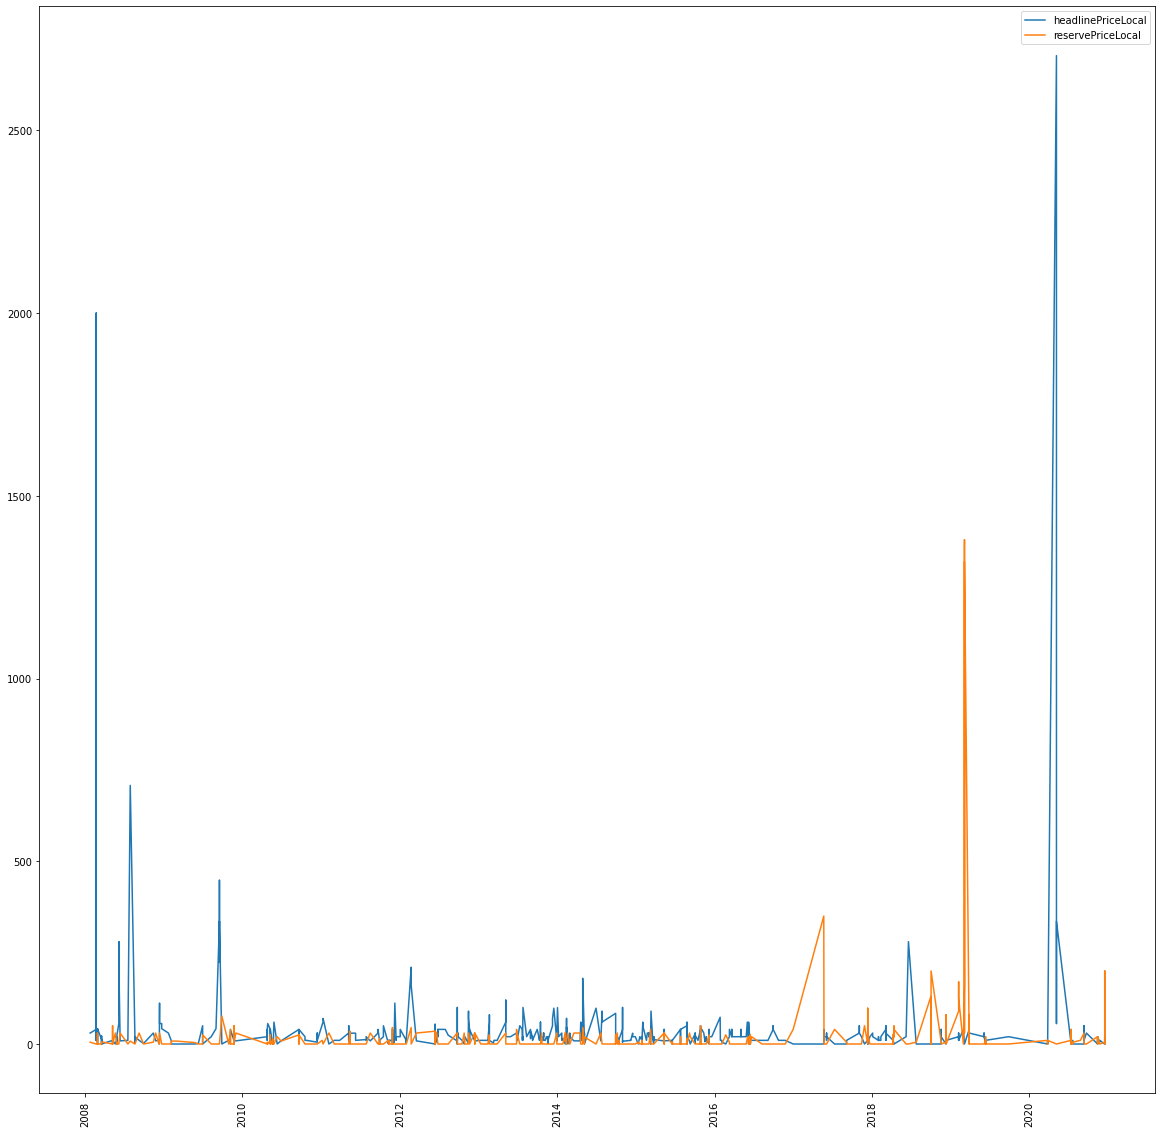

In [22]:
dfp['paired'].fillna(value=dfp['paired'].mean(axis=0),inplace=True)
dfp['unpaired'].fillna(value=dfp['unpaired'].mean(axis=0),inplace=True)
fig, ax = plt.subplots(figsize=(20, 20))
plt.plot(dfp['date'], dfp['paired'])
plt.plot(dfp['date'], dfp['unpaired'])
plt.xticks(rotation='vertical')
plt.legend(['headlinePriceLocal','reservePriceLocal'])
# plt.legend(['reservePriceLocal','headlinePriceLocal'])

In [23]:
# dfn['paired'].fillna(value=dfn['paired'].mean(axis=0),inplace=True)
# dfn['unpaired'].fillna(value=dfn['unpaired'].mean(axis=0),inplace=True)
# fig, ax = plt.subplots(figsize=(30, 30))
# plt.plot(dfn['date'], dfn['paired'])
# plt.plot(dfn['date'], dfn['unpaired'])
# plt.xticks(rotation='vertical')

In [24]:
start_date = '2000-01-01'
end_date = '2012-01-01'
mask = (df['date'] > start_date) & (df['date'] <= end_date)
data_2000_2012=df.loc[mask]
data_2000_2012.describe()

#MEAN
data_2000_2012['paired'].fillna(value=data_2000_2012['paired'].mean(axis=0),inplace=True)
data_2000_2012['unpaired'].fillna(value=data_2000_2012['unpaired'].mean(axis=0),inplace=True)
data_2000_2012['nBidders'].fillna(value=data_2000_2012['nBidders'].mean(axis=0),inplace=True)
data_2000_2012['licenceDuration'].fillna(value=data_2000_2012['licenceDuration'].mean(axis=0),inplace=True)
data_2000_2012['popCovered'].fillna(value=data_2000_2012['popCovered'].mean(axis=0),inplace=True)

#ZERO
data_2000_2012['reservePriceLocal'].fillna(value=0,inplace=True)
data_2000_2012['headlinePriceLocal'].fillna(value=0,inplace=True)
data_2000_2012['availableSpectrumPaired'].fillna(value=0,inplace=True)
data_2000_2012['availableSpectrumUnpaired'].fillna(value=0,inplace=True)

data_2000_2012['entrantReserved'].fillna(value=-1,inplace=True)
data_2000_2012['licenceUse'].fillna(value='other',inplace=True)
data_2000_2012['region'].fillna(value='ndf',inplace=True)

data_2000_2012.drop(['lotName', 'awardComments','blockFreq','lotComments','amount','minAmount'], axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
data_2000_2012.isnull().sum(axis = 0)
data_2000_2012.dropna(inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
data_2000_2012.isnull().sum(axis = 0)

awardId                      0
lotId                        0
awardName                    0
countryName                  0
alpha3code                   0
nBidders                     0
date                         0
awardClassDescription        0
availableSpectrumPaired      0
availableSpectrumUnpaired    0
licenceUse                   0
winner                       0
freqBand                     0
nationalLicence              0
region                       0
paired                       0
unpaired                     0
licenceDuration              0
popCovered                   0
reservePriceLocal            0
headlinePriceLocal           0
entrantReserved              0
year                         0
dtype: int64

In [27]:
data_2000_2012.dtypes

awardId                               int64
lotId                                 int64
awardName                            object
countryName                          object
alpha3code                           object
nBidders                            float64
date                         datetime64[ns]
awardClassDescription                object
availableSpectrumPaired             float64
availableSpectrumUnpaired           float64
licenceUse                           object
winner                               object
freqBand                             object
nationalLicence                       int64
region                               object
paired                              float64
unpaired                            float64
licenceDuration                     float64
popCovered                          float64
reservePriceLocal                   float64
headlinePriceLocal                  float64
entrantReserved                     float64
year                            

In [28]:
# label encoding the data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
lst=[]
for x in data_2000_2012.columns:
    if data_2000_2012[x].dtypes=='object':
        lst.append(x)
        
for x in lst:
    data_2000_2012[x] = data_2000_2012[x].astype(str)
    data_2000_2012[x]= le.fit_transform(data_2000_2012[x])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [29]:
data_2000_2012['AppointmentDay_year'] = data_2000_2012['date'].dt.year
data_2000_2012['AppointmentDay_month'] = data_2000_2012['date'].dt.month
data_2000_2012['AppointmentDay_day'] = data_2000_2012['date'].dt.day
data_2000_2012.drop(['date'], axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [30]:
target = data_2000_2012['headlinePriceLocal']
data_2000_2012.drop(['headlinePriceLocal'], axis=1,inplace=True)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(data_2000_2012, target)

In [31]:
start_date = '2020-06-01'
end_date = '2021-01-01'
mask = (df['date'] > start_date) & (df['date'] <= end_date)
data_2013_2013=df.loc[mask]
data_2013_2013.describe()

#MEAN
data_2013_2013['paired'].fillna(value=data_2013_2013['paired'].mean(axis=0),inplace=True)
data_2013_2013['unpaired'].fillna(value=data_2013_2013['unpaired'].mean(axis=0),inplace=True)
data_2013_2013['nBidders'].fillna(value=data_2013_2013['nBidders'].mean(axis=0),inplace=True)
data_2013_2013['licenceDuration'].fillna(value=data_2013_2013['licenceDuration'].mean(axis=0),inplace=True)
data_2013_2013['popCovered'].fillna(value=data_2013_2013['popCovered'].mean(axis=0),inplace=True)

#ZERO
data_2013_2013['reservePriceLocal'].fillna(value=0,inplace=True)
data_2013_2013['headlinePriceLocal'].fillna(value=0,inplace=True)
data_2013_2013['availableSpectrumPaired'].fillna(value=0,inplace=True)
data_2013_2013['availableSpectrumUnpaired'].fillna(value=0,inplace=True)

data_2013_2013['entrantReserved'].fillna(value=-1,inplace=True)
data_2013_2013['licenceUse'].fillna(value='other',inplace=True)
data_2013_2013['region'].fillna(value='ndf',inplace=True)

data_2013_2013.drop(['lotName', 'awardComments','blockFreq','lotComments','amount','minAmount'], axis=1,inplace=True)

data_2013_2013.isnull().sum(axis = 0)
data_2013_2013.dropna(inplace=True)
data_2013_2013.isnull().sum(axis = 0)

# label encoding the data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
lst=[]
for x in data_2013_2013.columns:
    if data_2013_2013[x].dtypes=='object':
        lst.append(x)
        
for x in lst:
    data_2013_2013[x] = data_2013_2013[x].astype(str)
    data_2013_2013[x]= le.fit_transform(data_2013_2013[x])
    
data_2013_2013['AppointmentDay_year'] = data_2013_2013['date'].dt.year
data_2013_2013['AppointmentDay_month'] = data_2013_2013['date'].dt.month
data_2013_2013['AppointmentDay_day'] = data_2013_2013['date'].dt.day
data_2013_2013.drop(['date'], axis=1,inplace=True)

target_2013 = data_2013_2013['headlinePriceLocal']
data_2013_2013.drop(['headlinePriceLocal'], axis=1,inplace=True)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(data_2013_2013, target_2013)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:40: Settin

In [32]:
start_date = '2020-01-01'
end_date = '2021-01-01'
mask = (df['date'] > start_date) & (df['date'] <= end_date)
data_2013_2013=df.loc[mask]
data_2013_2013.describe()

#MEAN
data_2013_2013['paired'].fillna(value=data_2013_2013['paired'].mean(axis=0),inplace=True)
data_2013_2013['unpaired'].fillna(value=data_2013_2013['unpaired'].mean(axis=0),inplace=True)
data_2013_2013['nBidders'].fillna(value=data_2013_2013['nBidders'].mean(axis=0),inplace=True)
data_2013_2013['licenceDuration'].fillna(value=data_2013_2013['licenceDuration'].mean(axis=0),inplace=True)
data_2013_2013['popCovered'].fillna(value=data_2013_2013['popCovered'].mean(axis=0),inplace=True)

#ZERO
data_2013_2013['reservePriceLocal'].fillna(value=0,inplace=True)
data_2013_2013['headlinePriceLocal'].fillna(value=0,inplace=True)
data_2013_2013['availableSpectrumPaired'].fillna(value=0,inplace=True)
data_2013_2013['availableSpectrumUnpaired'].fillna(value=0,inplace=True)

data_2013_2013['entrantReserved'].fillna(value=-1,inplace=True)
data_2013_2013['licenceUse'].fillna(value='other',inplace=True)
data_2013_2013['region'].fillna(value='ndf',inplace=True)

data_2013_2013.drop(['lotName', 'awardComments','blockFreq','lotComments','amount','minAmount'], axis=1,inplace=True)

data_2013_2013.isnull().sum(axis = 0)
data_2013_2013.dropna(inplace=True)
data_2013_2013.isnull().sum(axis = 0)

# label encoding the data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
lst=[]
for x in data_2013_2013.columns:
    if data_2013_2013[x].dtypes=='object':
        lst.append(x)
        
for x in lst:
    data_2013_2013[x] = data_2013_2013[x].astype(str)
    data_2013_2013[x]= le.fit_transform(data_2013_2013[x])
    
data_2013_2013['AppointmentDay_year'] = data_2013_2013['date'].dt.year
data_2013_2013['AppointmentDay_month'] = data_2013_2013['date'].dt.month
data_2013_2013['AppointmentDay_day'] = data_2013_2013['date'].dt.day
data_2013_2013.drop(['date'], axis=1,inplace=True)

# target_2013 = data_2013_2013['headlinePriceLocal']
# data_2013_2013.drop(['headlinePriceLocal'], axis=1,inplace=True)
# from sklearn.linear_model import LinearRegression
# reg = LinearRegression().fit(data_2013_2013, target_2013)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:40: Settin

In [33]:
target_2013 = data_2013_2013['headlinePriceLocal']
data_2013_2013.drop(['headlinePriceLocal'], axis=1,inplace=True)
predict_2013 = reg.predict(data_2013_2013)

In [34]:
from sklearn.metrics import r2_score
predict_2013=abs(predict_2013)
r2_score(target_2013, (predict_2013)+0.1)

0.67188471533064

In [35]:
# print(abs(predict_2013))

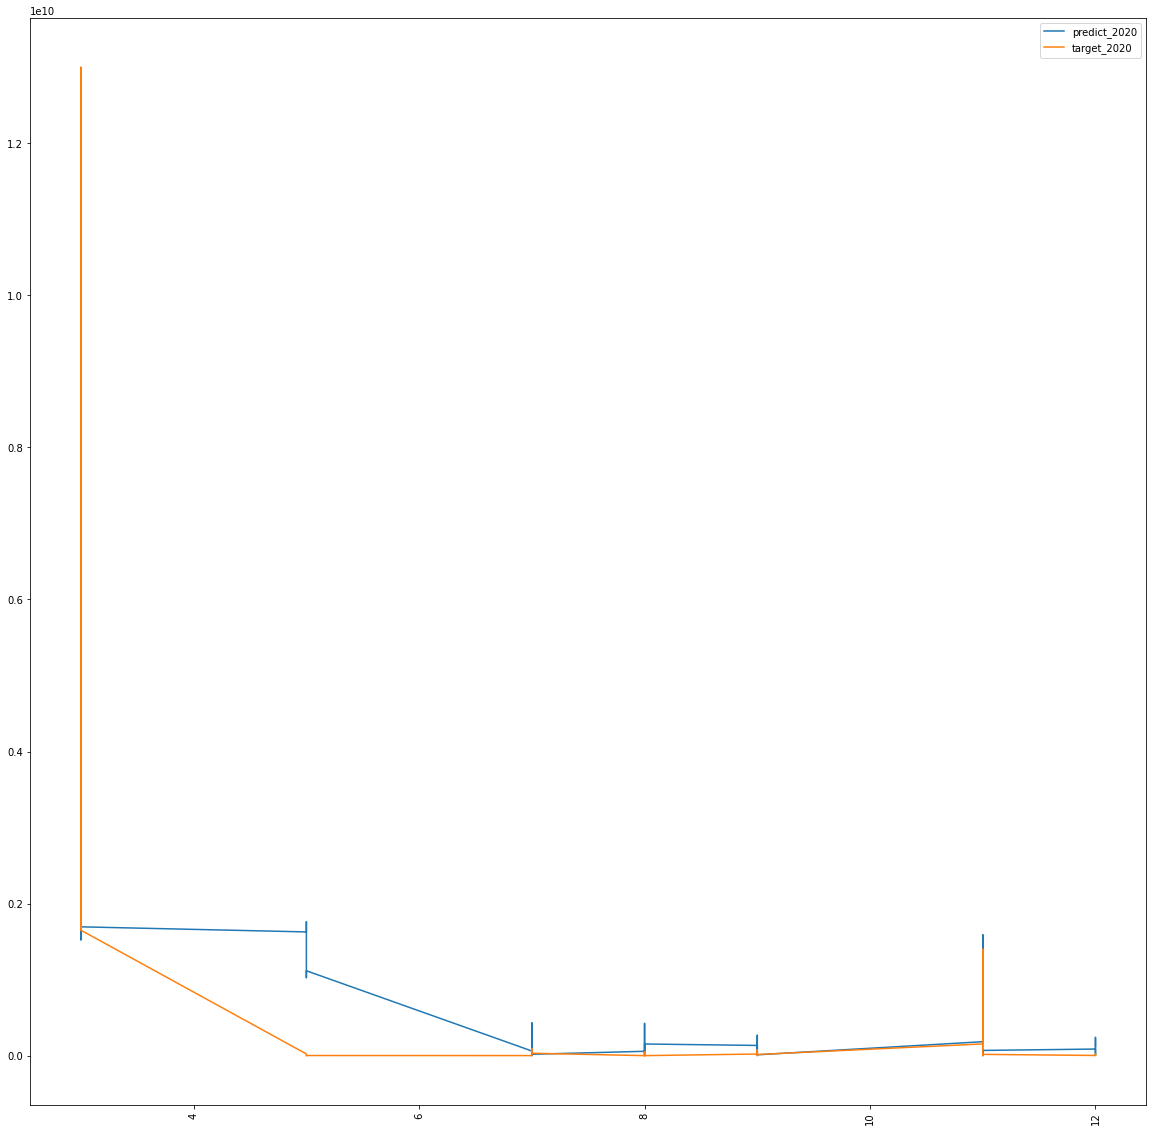

In [36]:
fig, ax = plt.subplots(figsize=(20, 20))
noise = abs(np.random.normal(1e5, 1e8, predict_2013.shape))

plt.plot(data_2013_2013['AppointmentDay_month'], predict_2013+noise)
plt.plot(data_2013_2013['AppointmentDay_month'], target_2013)
plt.xticks(rotation='vertical')
plt.legend(['predict_2020','target_2020'])